In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy.stats import iqr
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("Homedata.csv")

In [3]:
data.shape

(4600, 18)

In [4]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
 #Check for missing values and sum them across columns-
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


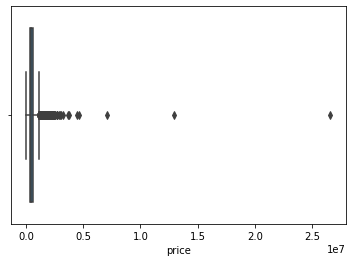

In [9]:
# find outlier and remove outlier
#data Visualization
sns.boxplot(data['price'])
plt.show()

In [10]:
# Method for IQR
#IQR = Q3-Q1

In [11]:
Q1 = np.percentile(data['price'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['price'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['price'], 75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

322750.0
460943.46153850004
654975.0


In [12]:
IQR = Q3 - Q1
print(IQR)

332225.0


In [13]:
#lowlimit/uplimit 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)

-175587.5
1153312.5


In [14]:
# find the value of outlier in data set
outlier = []
for x in (data['price']):
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        print(outlier)

[2384000.0]
[2384000.0, 1400000.0]
[2384000.0, 1400000.0, 1200000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0, 1580000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0, 1580000.0, 1870000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0, 1580000.0, 1870000.0, 1800000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0, 1580000.0, 1870000.0, 1800000.0, 3200000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0, 1580000.0, 1870000.0, 1800000.0, 3200000.0, 1500000.0]
[2384000.0, 1400000.0, 1200000.0, 1395000.0, 2280000.0, 1425000.0, 1225000.0, 1580000.0, 1870000.0, 1800000.0, 3200000.0, 1500000.

In [15]:
print(np.where(data['price']>1153312.5))

(array([   1,   11,   14,   99,  122,  133,  193,  201,  217,  227,  252,
        284,  285,  309,  356,  359,  366,  373,  404,  414,  418,  452,
        462,  471,  478,  482,  488,  524,  525,  534,  537,  564,  581,
        603,  606,  611,  650,  704,  734,  745,  839,  847,  862,  880,
        927,  965,  970,  979,  995, 1010, 1056, 1077, 1107, 1127, 1128,
       1132, 1143, 1176, 1186, 1209, 1258, 1268, 1275, 1301, 1302, 1337,
       1345, 1355, 1369, 1386, 1411, 1436, 1464, 1468, 1470, 1500, 1518,
       1543, 1567, 1571, 1584, 1600, 1602, 1617, 1629, 1636, 1637, 1660,
       1662, 1675, 1690, 1813, 1837, 1848, 1858, 1911, 1951, 1974, 2005,
       2030, 2040, 2061, 2083, 2093, 2094, 2108, 2109, 2139, 2186, 2206,
       2226, 2250, 2286, 2328, 2333, 2357, 2361, 2364, 2389, 2401, 2412,
       2434, 2454, 2495, 2500, 2533, 2584, 2607, 2654, 2670, 2672, 2699,
       2705, 2711, 2712, 2713, 2724, 2725, 2728, 2731, 2761, 2767, 2772,
       2786, 2815, 2825, 2837, 2841, 2846, 2858, 2

In [16]:
data.drop(data.index[[ 1,   11,   14,   99,  122,  133,  193,  201,  217,  227,  282,
        283,  307,  354,  357,  364,  371,  410,  414,  448,  458,  467,
        474,  478,  484,  520,  521,  530,  533,  560,  597,  600,  605,
        644,  698,  728,  739,  833,  841,  856,  874,  921,  959,  964,
        973,  989, 1004, 1050, 1071, 1101, 1121, 1122, 1135, 1168, 1178,
       1201, 1250, 1260, 1267, 1293, 1294, 1329, 1337, 1347, 1361, 1378,
       1403, 1428, 1456, 1460, 1462, 1492, 1510, 1570, 1587, 1601, 1613,
       1620, 1642, 1644, 1657, 1672, 1795, 1819, 1830, 1891, 1931, 1954,
       1985, 2010, 2020, 2041, 2072, 2086, 2087, 2117, 2164, 2184, 2204,
       2228, 2308, 2331, 2335, 2338, 2363, 2375, 2386, 2408, 2428, 2469,
       2474, 2507, 2558, 2581, 2642, 2644, 2671, 2677, 2683, 2684, 2695,
       2696, 2698, 2701, 2736, 2753, 2781, 2791, 2803, 2807, 2812, 2824,
       2849, 2851, 2883, 2937, 2938, 2944, 2966, 2968, 3022, 3081, 3097,
       3117, 3163, 3164, 3172, 3196, 3243, 3246, 3248, 3299, 3311, 3330,
       3351, 3422, 3431, 3453, 3458, 3461, 3464, 3496, 3521, 3525, 3571,
       3591, 3596, 3601, 3623, 3629, 3644, 3657, 3661, 3667, 3683, 3709,
       3728, 3741, 3743, 3751, 3758, 3819, 3823, 3833, 3835, 3870, 3873,
       3883, 3895, 3919, 3923, 3924, 3928, 3969, 3977, 3990, 3992, 4002,
       4080, 4095, 4101, 4102, 4127, 4162, 4167, 4204, 4230, 4234, 4281,
       4302, 4303, 4418, 4522]], inplace = True)
print(data)

                     date          price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  313000.000000       3.0       1.50         1340   
2     2014-05-02 00:00:00  342000.000000       3.0       2.00         1930   
3     2014-05-02 00:00:00  420000.000000       3.0       2.25         2000   
4     2014-05-02 00:00:00  550000.000000       4.0       2.50         1940   
5     2014-05-02 00:00:00  490000.000000       2.0       1.00          880   
...                   ...            ...       ...        ...          ...   
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above

In [17]:
data.shape

(4387, 18)

In [18]:
# checking the distribution of categorical data
print(data.bedrooms.value_counts())
print(data.bathrooms.value_counts())
print(data.condition.value_counts())

3.0    1943
4.0    1465
2.0     534
5.0     331
6.0      60
1.0      37
7.0      12
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64
2.50    1127
1.00     709
1.75     600
2.00     410
2.25     402
1.50     276
2.75     266
3.00     161
3.50     152
3.25     130
3.75      36
4.50      27
4.00      22
4.25      22
0.75      17
4.75       7
5.00       5
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64
3    2733
4    1208
5     409
2      31
1       6
Name: condition, dtype: int64


In [19]:
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()
# Encode each categorical feature
data['date'] = label_encoder.fit_transform(data['date'])
data['city'] = label_encoder.fit_transform(data['city'])
data['statezip'] = label_encoder.fit_transform(data['statezip'])
data['country'] = label_encoder.fit_transform(data['country'])
data['street'] = label_encoder.fit_transform(data['street'])

# updated DataFrame
print(data)

      date          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0        0  313000.000000       3.0       1.50         1340      7912     1.5   
2        0  342000.000000       3.0       2.00         1930     11947     1.0   
3        0  420000.000000       3.0       2.25         2000      8030     1.0   
4        0  550000.000000       4.0       2.50         1940     10500     1.0   
5        0  490000.000000       2.0       1.00          880      6380     1.0   
...    ...            ...       ...        ...          ...       ...     ...   
4595    68  308166.666667       3.0       1.75         1510      6360     1.0   
4596    68  534333.333333       3.0       2.50         1460      7573     2.0   
4597    68  416904.166667       3.0       2.50         3010      7014     2.0   
4598    69  203400.000000       4.0       2.00         2090      6630     1.0   
4599    69  220600.000000       3.0       2.50         1490      8102     2.0   

      waterfront  view  con

In [20]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1458,36,62,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2194,18,26,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4077,3,7,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4163,31,31,0
5,0,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,3368,35,54,0


In [21]:
data.dtypes

date               int32
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street             int32
city               int32
statezip           int32
country            int32
dtype: object

In [22]:
#Performing feature engineering 
from datetime import datetime
current_year = datetime.now().year
data['age_of_house'] = current_year - data['yr_built']
data['total_sqft'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement']
data['cost_persqft'] = data['price'] / data['total_sqft']
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age_of_house,total_sqft,cost_persqft
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,1458,36,62,0,68,10592,29.550604
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,2194,18,26,0,57,15807,21.635984
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,4077,3,7,0,60,12030,34.912718
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,4163,31,31,0,47,14380,38.247566
5,0,490000.0,2.0,1.00,880,6380,1.0,0,0,3,...,0,1938,1994,3368,35,54,0,85,8140,60.196560


In [23]:
X = data.drop(['country','date','price'],axis=1)
Y = data['price']

In [24]:
print(X)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
5          2.0       1.00          880      6380     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [25]:
print(Y)

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4387, dtype: float64


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Model Training and evaluation:

In [27]:
#Linear Regression - R squared Error :0.6224057772100291-so it will not consider

In [28]:
# Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
# Define the random forest regression model
RFR = RandomForestRegressor()
# Train the model
RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [29]:
# prediction on Training data
y_prediction = RFR.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, y_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8864847713381956


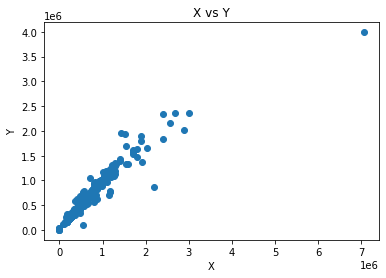

In [30]:
plt.scatter(Y_test, y_prediction)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")
plt.show()

In [31]:
RFR.score(X_test,Y_test)

0.8864847713381956

# Hyper Permaeter Tunning


In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 5, 10],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider at each split
}

In [33]:
rf = RandomForestRegressor()

In [34]:
grid_search = GridSearchCV(rf, param_grid, cv=5)

In [35]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [36]:
print("best_parameters : ", grid_search.best_params_)
print("best_model : ", grid_search.best_estimator_)
print ("best score: ", grid_search.best_score_)

best_parameters :  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best_model :  RandomForestRegressor(min_samples_leaf=2)
best score:  0.8164762526453064


In [37]:
import pickle

In [39]:
pickle.dump(RFR,open('model1.pkl','wb'))